In [1]:
import json
from sklearn import cluster
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
with open('repoTopicVec.json') as f:
    repos = json.load(f)

In [4]:
topicVec = []
for repo in repos:
    vector = repos[repo]['topic_vector']
    topicVec.append(list(vector.values()))

len(topicVec), len(topicVec[0])

(100, 123)

## KMeans

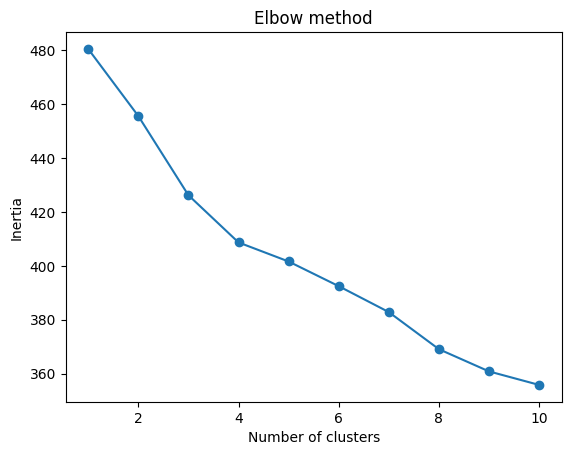

In [5]:
inertias = []
for k in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=k, random_state=42)
    kmeans.fit(topicVec)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [6]:
kmeans = cluster.KMeans(n_clusters=4, random_state=42)
kmeans.fit(topicVec)
repoLabels_Kmeans = kmeans.labels_
len(set(repoLabels_Kmeans))

4

In [7]:
Counter(repoLabels_Kmeans)

Counter({1: 63, 2: 20, 0: 13, 3: 4})

In [8]:
labelRepoName_Kmeans = {}
for l in set(repoLabels_Kmeans):
    labelRepoName_Kmeans[l] = []

for repo, label in zip(repos, repoLabels_Kmeans):
    labelRepoName_Kmeans[label].append(repo)

len(labelRepoName_Kmeans)

4

In [9]:
labelRepoName_Kmeans

{0: ['GFPGAN',
  'MockingBird',
  'pytorch-tutorial',
  'Real-Time-Voice-Cloning',
  'so-vits-svc',
  'stable-diffusion-webui',
  'TTS',
  'datasets',
  'deep-learning-for-image-processing',
  'diffusers',
  'Dive-into-DL-PyTorch',
  'pytorch-CycleGAN-and-pix2pix',
  'pytorch_geometric'],
 1: ['100-Days-Of-ML-Code',
  'AI-For-Beginners',
  'annotated_deep_learning_paper_implementations',
  'awesome-deep-learning-papers',
  'caffe',
  'ColossalAI',
  'cs-video-courses',
  'd2l-zh',
  'Deep-Learning-Papers-Reading-Roadmap',
  'DeepFaceLab',
  'DeepSpeech',
  'DeepSpeed',
  'faceswap',
  'fastai',
  'handson-ml',
  'machine-learning-for-software-engineers',
  'mediapipe',
  'ML-From-Scratch',
  'opencv',
  'openpose',
  'paper-reading',
  'Prompt-Engineering-Guide',
  'pytorch',
  'spleeter',
  'stanford_alpaca',
  'TensorFlow-Examples',
  'tensorflow',
  'tesseract.js',
  'ultralytics',
  'yolov5',
  '100-Days-Of-ML-Code_2',
  'awesome-deep-learning',
  'awesome-nlp',
  'awesome-producti

## DBSCAN

In [22]:
dbscan = cluster.DBSCAN(eps=0.5, min_samples=2)
repoLabels_DBSCAN = dbscan.fit_predict(topicVec)
len(set(repoLabels_DBSCAN))

5

In [23]:
Counter(repoLabels_DBSCAN)

Counter({-1: 90, 0: 2, 1: 3, 2: 2, 3: 3})

## HDBSCAN

In [68]:
hdbscan = cluster.HDBSCAN(min_cluster_size=2)
repoLabels_HDBSCAN = hdbscan.fit_predict(topicVec)
len(set(repoLabels_HDBSCAN))

19

In [69]:
Counter(repoLabels_HDBSCAN)

Counter({-1: 59,
         5: 2,
         13: 3,
         3: 2,
         16: 3,
         0: 2,
         6: 2,
         17: 3,
         10: 2,
         4: 3,
         7: 2,
         12: 2,
         9: 2,
         11: 2,
         2: 2,
         1: 2,
         8: 2,
         15: 3,
         14: 2})

In [70]:
labelRepoName_HDBSCAN = {}
for l in set(repoLabels_HDBSCAN):
    labelRepoName_HDBSCAN[l] = []

for repo, label in zip(repos, repoLabels_HDBSCAN):
    labelRepoName_HDBSCAN[label].append(repo)

len(labelRepoName_HDBSCAN)

19

In [71]:
labelRepoName_HDBSCAN

{0: ['DeepFaceLab', 'faceswap'],
 1: ['ultralytics', 'yolov5'],
 2: ['stable-diffusion-webui', 'diffusers'],
 3: ['ColossalAI', 'DeepSpeed'],
 4: ['handson-ml', 'tensorflow', 'CNTK'],
 5: ['AI-Expert-Roadmap', 'pytorch-lightning'],
 6: ['fastai', 'fastbook'],
 7: ['MockingBird', 'TTS'],
 8: ['awesome-deep-learning', 'Machine-Learning-Tutorials'],
 9: ['pytorch', 'ivy'],
 10: ['gradio', 'streamlit'],
 11: ['spleeter', 'TensorFlow-Course'],
 12: ['Prompt-Engineering-Guide', 'stanford_alpaca'],
 13: ['caffe', 'CLIP', 'tensor2tensor'],
 14: ['lectures', 'ML-NLP'],
 15: ['JARVIS', 'stable-diffusion-webui-colab', 'supervision'],
 16: ['Deep-Learning-Papers-Reading-Roadmap', 'first-order-model', 'openface'],
 17: ['GFPGAN', 'deep-learning-for-image-processing', 'pytorch_geometric'],
 -1: ['100-Days-Of-ML-Code',
  'AI-For-Beginners',
  'annotated_deep_learning_paper_implementations',
  'applied-ml',
  'awesome-datascience',
  'awesome-deep-learning-papers',
  'cs-video-courses',
  'd2l-zh',
  